Name Bentao Li

Labpartner(s)

In [49]:
#import statements go here
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import matplotlib.path as mpath

# Class 7.1

Today we are going to go over cartopy a bit more, Victoria is giving a demo on how to make movies, and you will start the Pandas course in Datacamp.

Note that due date for Lab 6.2 is on Thursday. Take your time and ask questions.

# Warmups 7.1

**W.1** Make a map of Antarctica using a polar projection in cartopy. Add a marker for McMurdo Station.

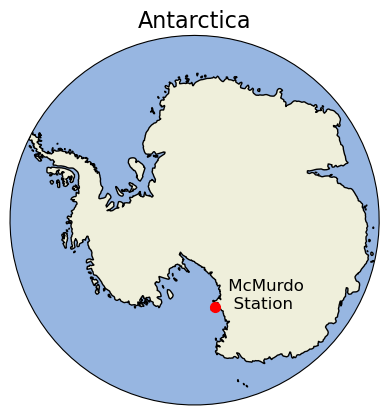

In [69]:
# Create a polar projection of Antarctica
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# Add features
# ax.gridlines()
ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.add_feature(cartopy.feature.OCEAN, zorder=1)
ax.add_feature(cartopy.feature.COASTLINE, zorder=2)

# Set the extent to focus on Antarctica
ax.set_extent([-180, 180, -90, -65], crs=ccrs.PlateCarree())

# Add a marker for McMurdo Station
mcmurdo_lon, mcmurdo_lat = 166.6681, -77.8419
ax.plot(mcmurdo_lon, mcmurdo_lat, marker='o', color='red',markersize=7, transform=ccrs.PlateCarree())
ax.text(mcmurdo_lon - 5, mcmurdo_lat + 0.5, ' McMurdo \n  Station', fontsize=12, transform=ccrs.PlateCarree(), color='black')
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

# Title
plt.title('Antarctica', fontsize=16)
plt.show()

# Lecture 7.1

### Agenda:

- Questions
- Go over some cartopy from last time (corrected lab)
- Movie demo from Victoria

### Questions

# Lab 7.1

**E.1** Complete Data Manipulation with Pandas Ch 1-2 in datacamp. I'm assigning all of this course to the class, as many of you have .csv type data that works well with Pand


**E.2** Make notes for yourself on progamming tecniques and commands you learned in the datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

**E.3** Make an animation of some data using the methods that Victoria demonstrated. You can use some of the model data we have been looking at, or animate a plot of your data, or whatever you like. The goal here is to get familiar with the animation methods and tell a story using data. You will present this to the class next Tuesday (remember 10/17 is a holiday).

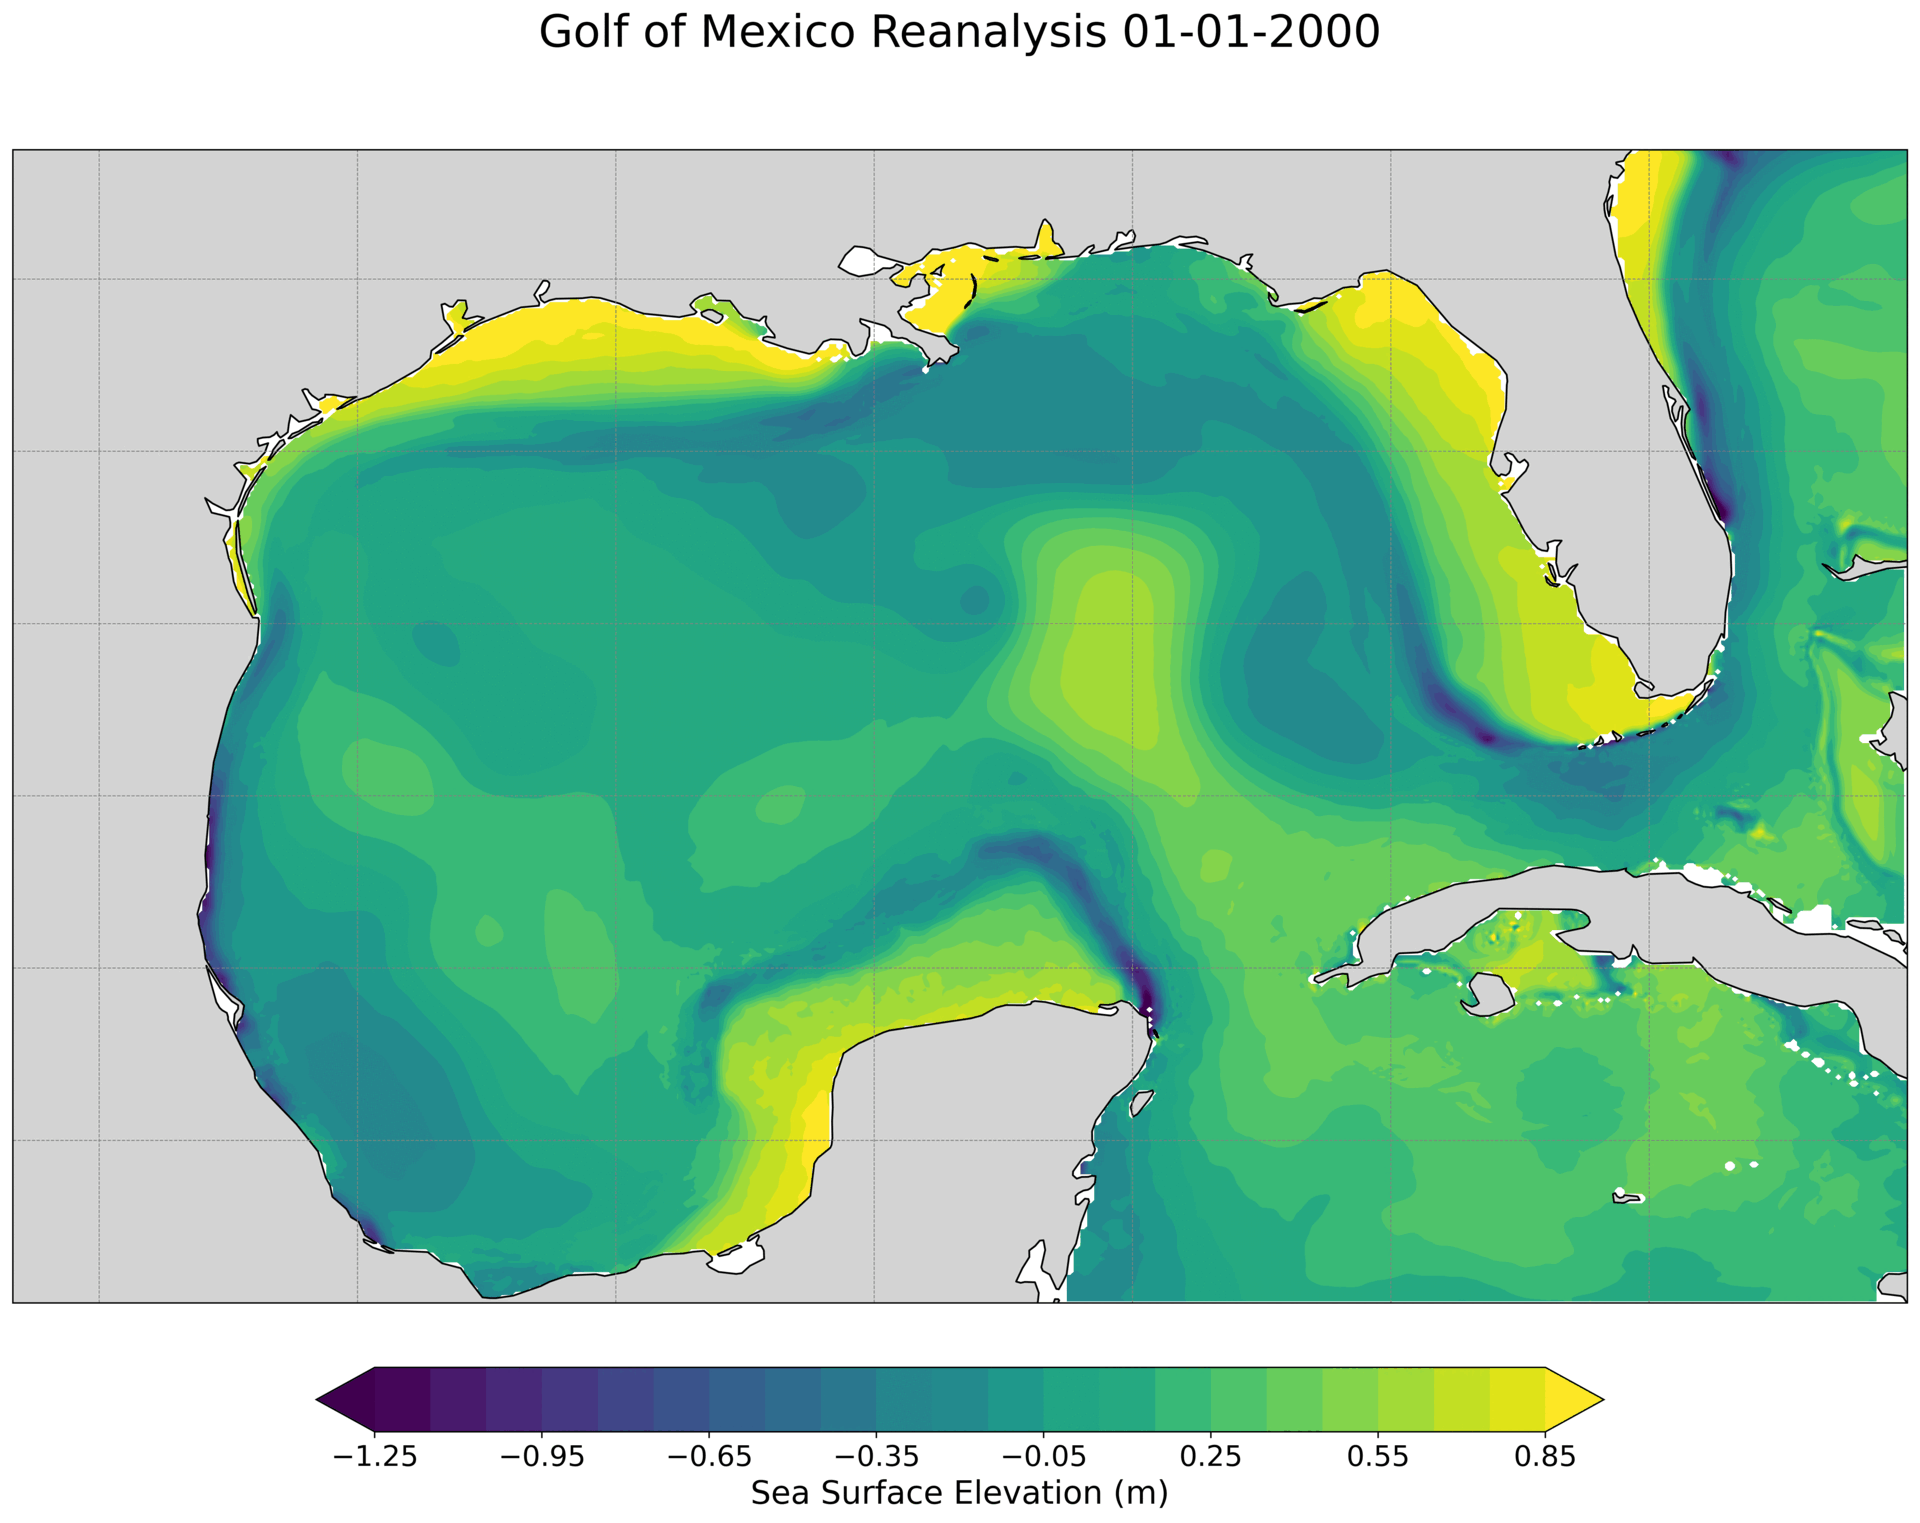

In [124]:
#! /usr/bin/env python
import pandas as pd
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
import matplotlib.pyplot as plt
import numpy as np     #work with numbers
import xarray as xr     #work with arrays and open files
import datetime        #work with date
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import colorbar, colors

#Sets font formats
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
#mpl.rcParams['lines.linewidth'] = 6.0

#Open one of the files to see how the data looks like: 
link = "C:/OCS/4001/precip.pentad.mean.rt.nc"
data = xr.open_dataset(link, decode_times=False)


save_location = 'C:/OCS/4001/HYCOM/Sample_output/'
file_name = 'Golf_of_Mexico_Reanalysis_Precip'
data

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 1808)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) float64 1.753e+06 1.753e+06 1.753e+06 ... 1.97e+06 1.97e+06
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation Pentad RT data (excl...
    history:        Created by CAS 09/2012  using Version v0011
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/pentad
    Version:        V1201
    hisotry:        Converted to chunked, deflated non-packed NetCDF4 Jul 2014
    dataset_title:  CPC Merged Analysis of Precipitation
    version:        v0011
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    data_modified:  2024-10-10

1753152.0
0


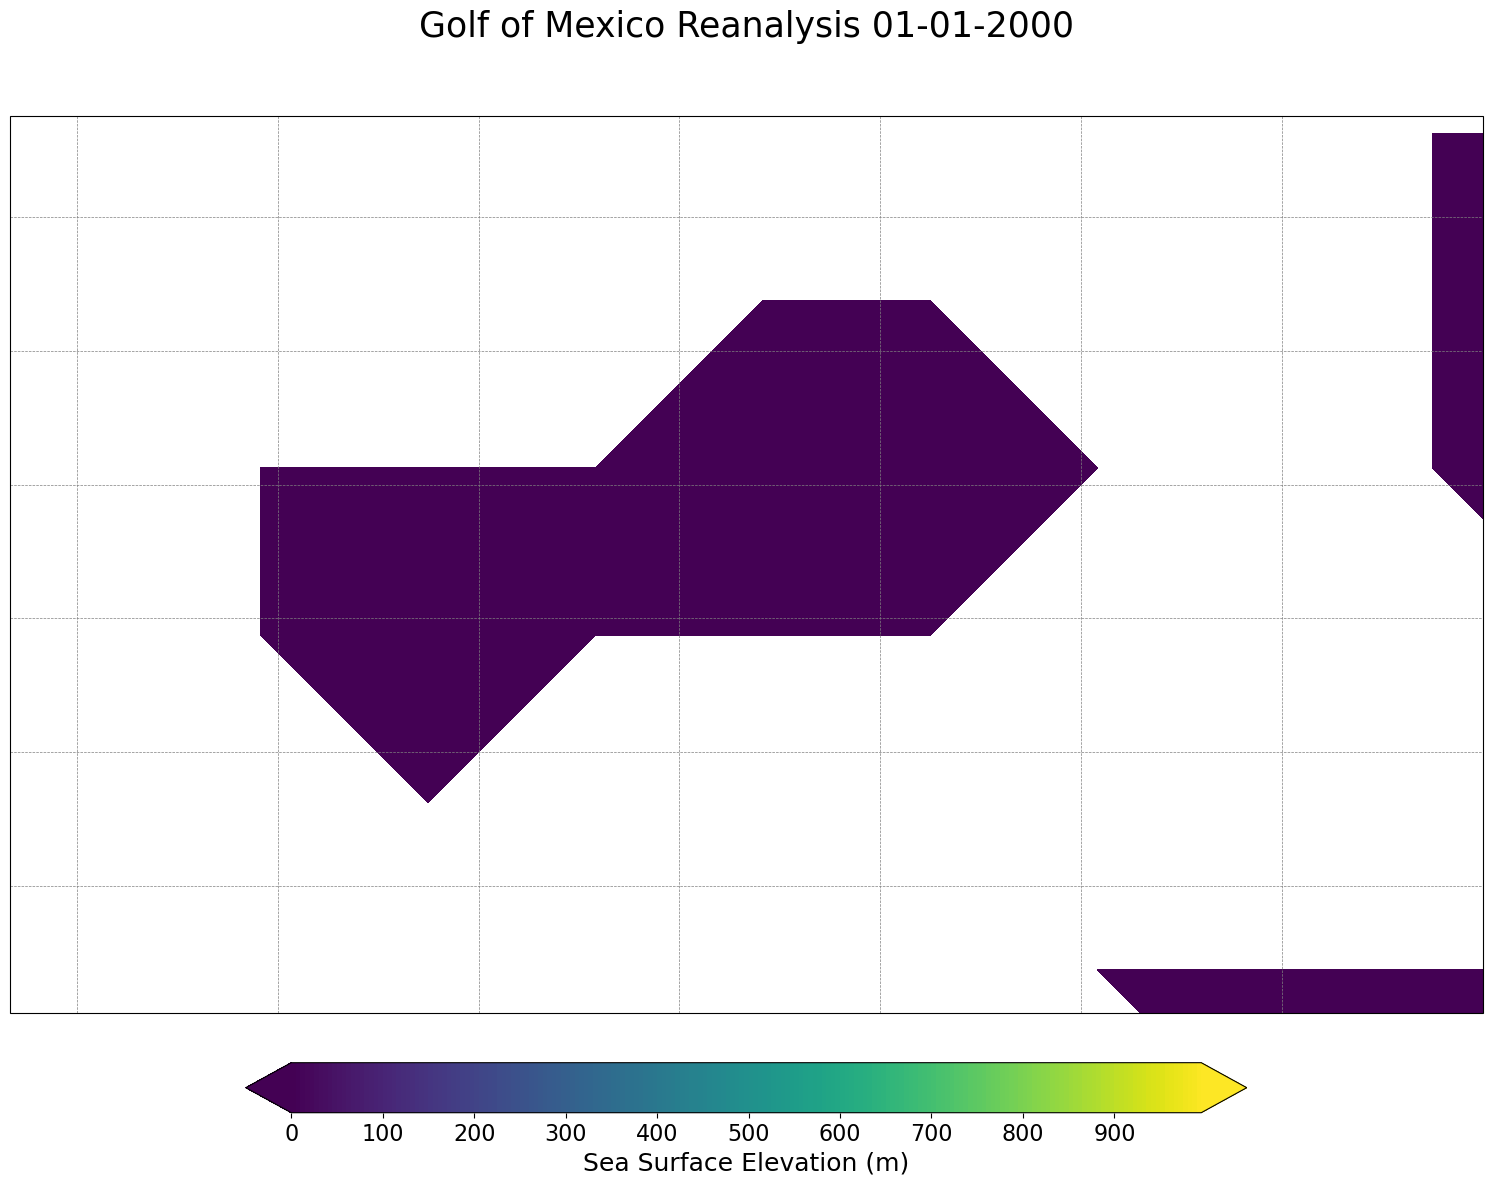

1753272.0
1


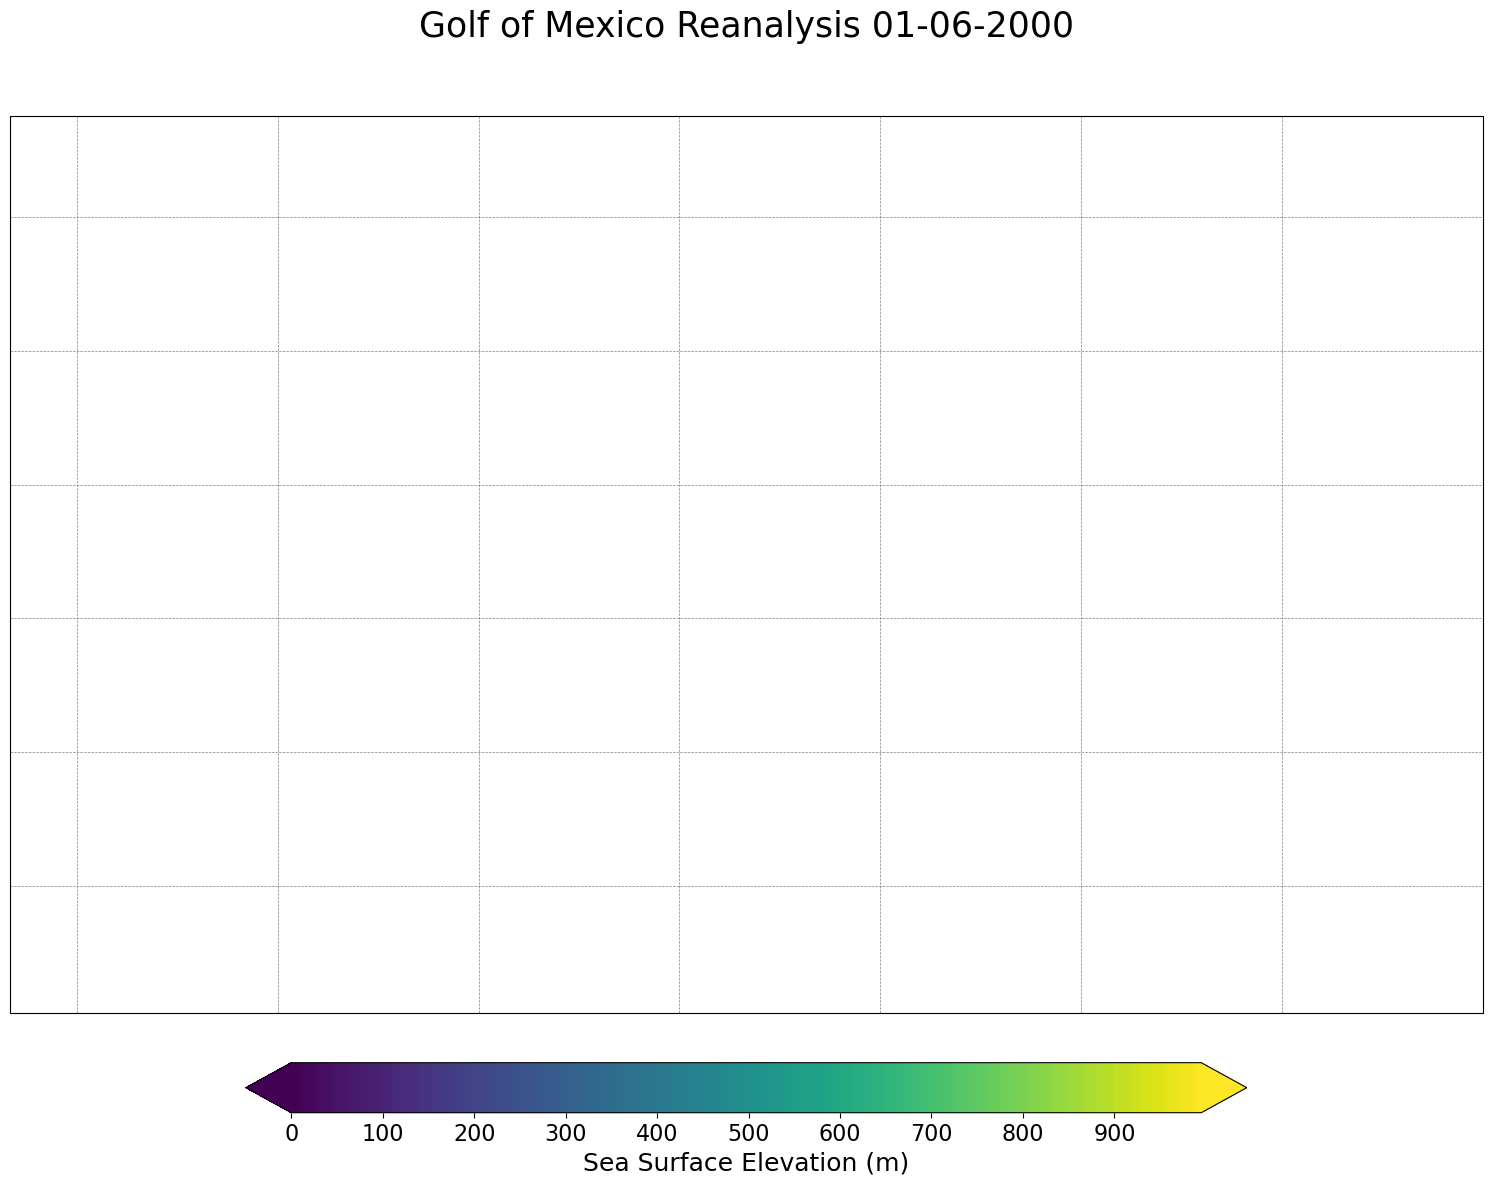

1753392.0
2


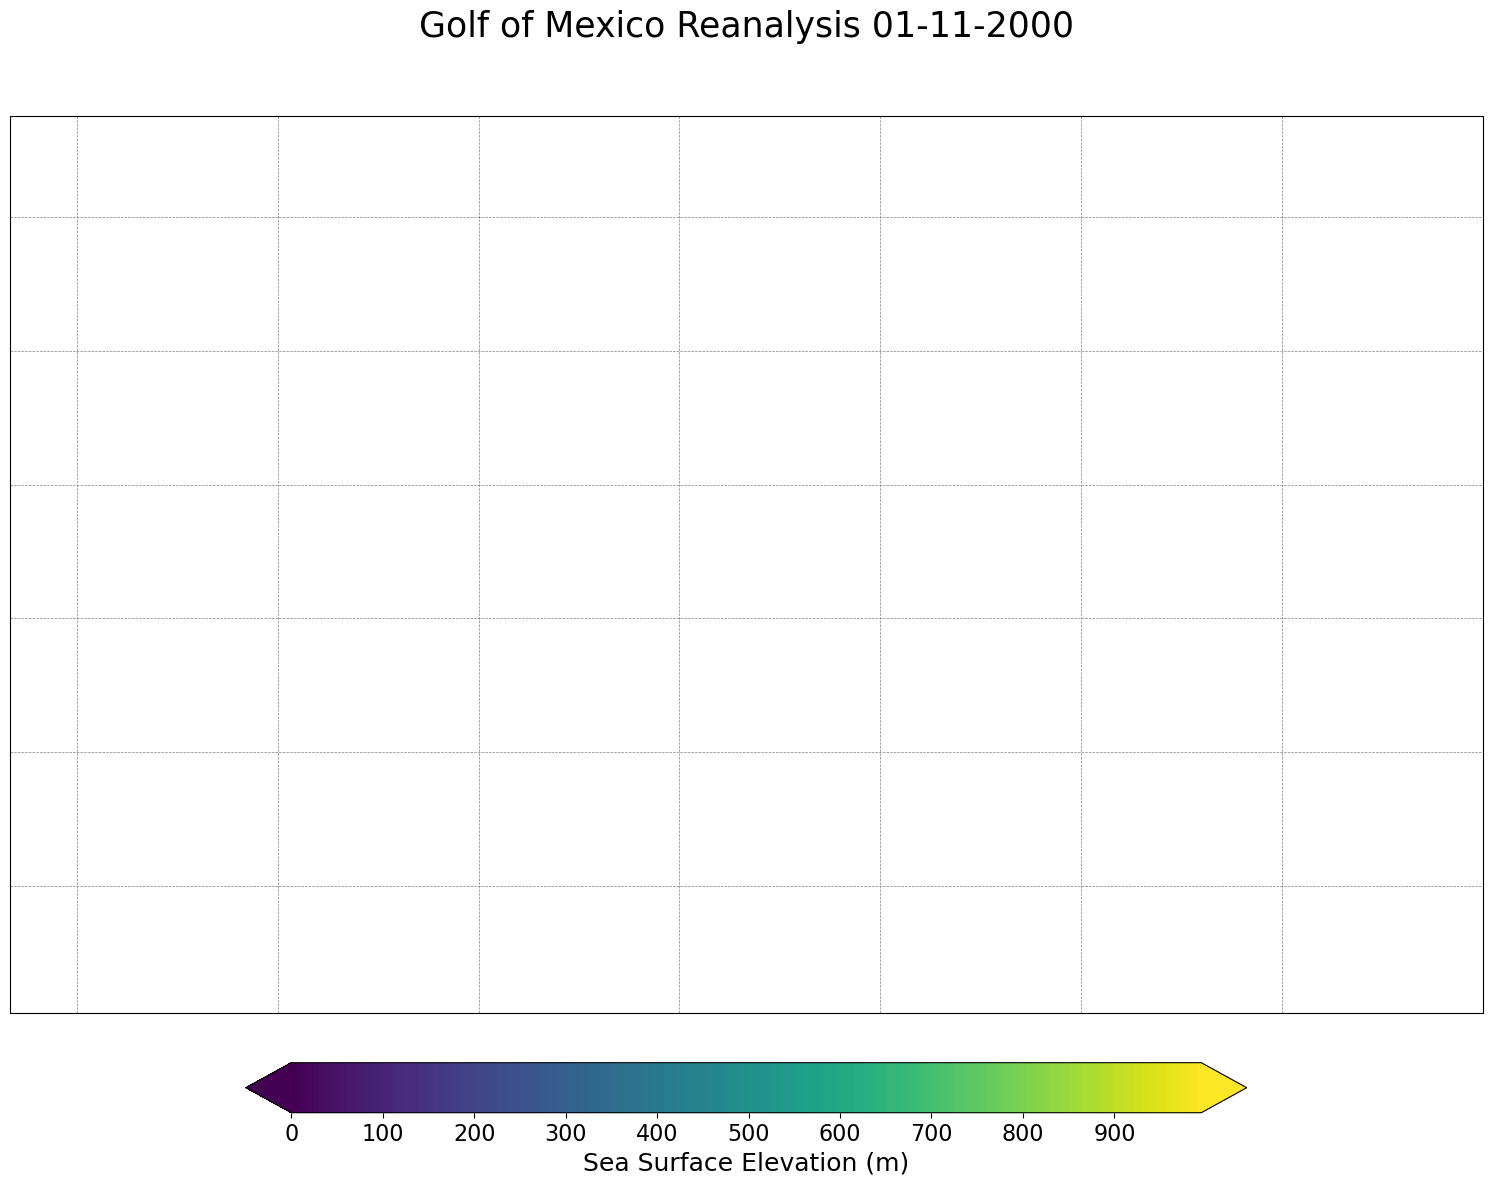

1753512.0
3


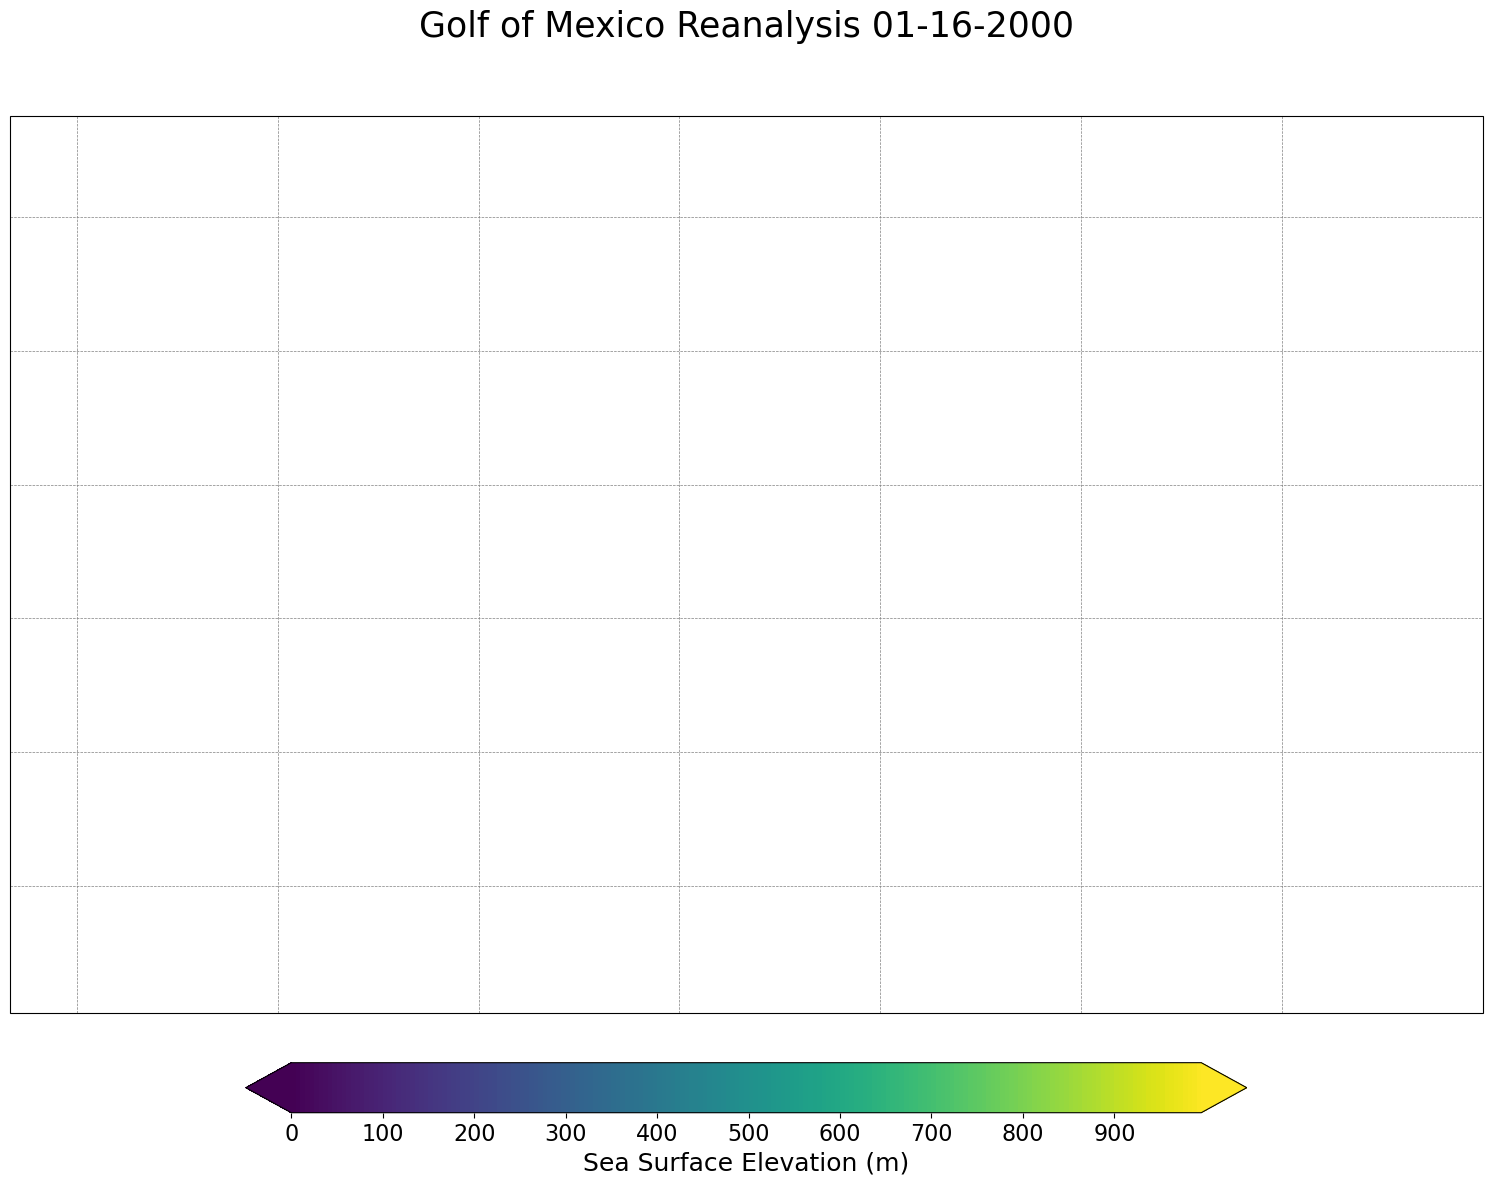

1753632.0
4


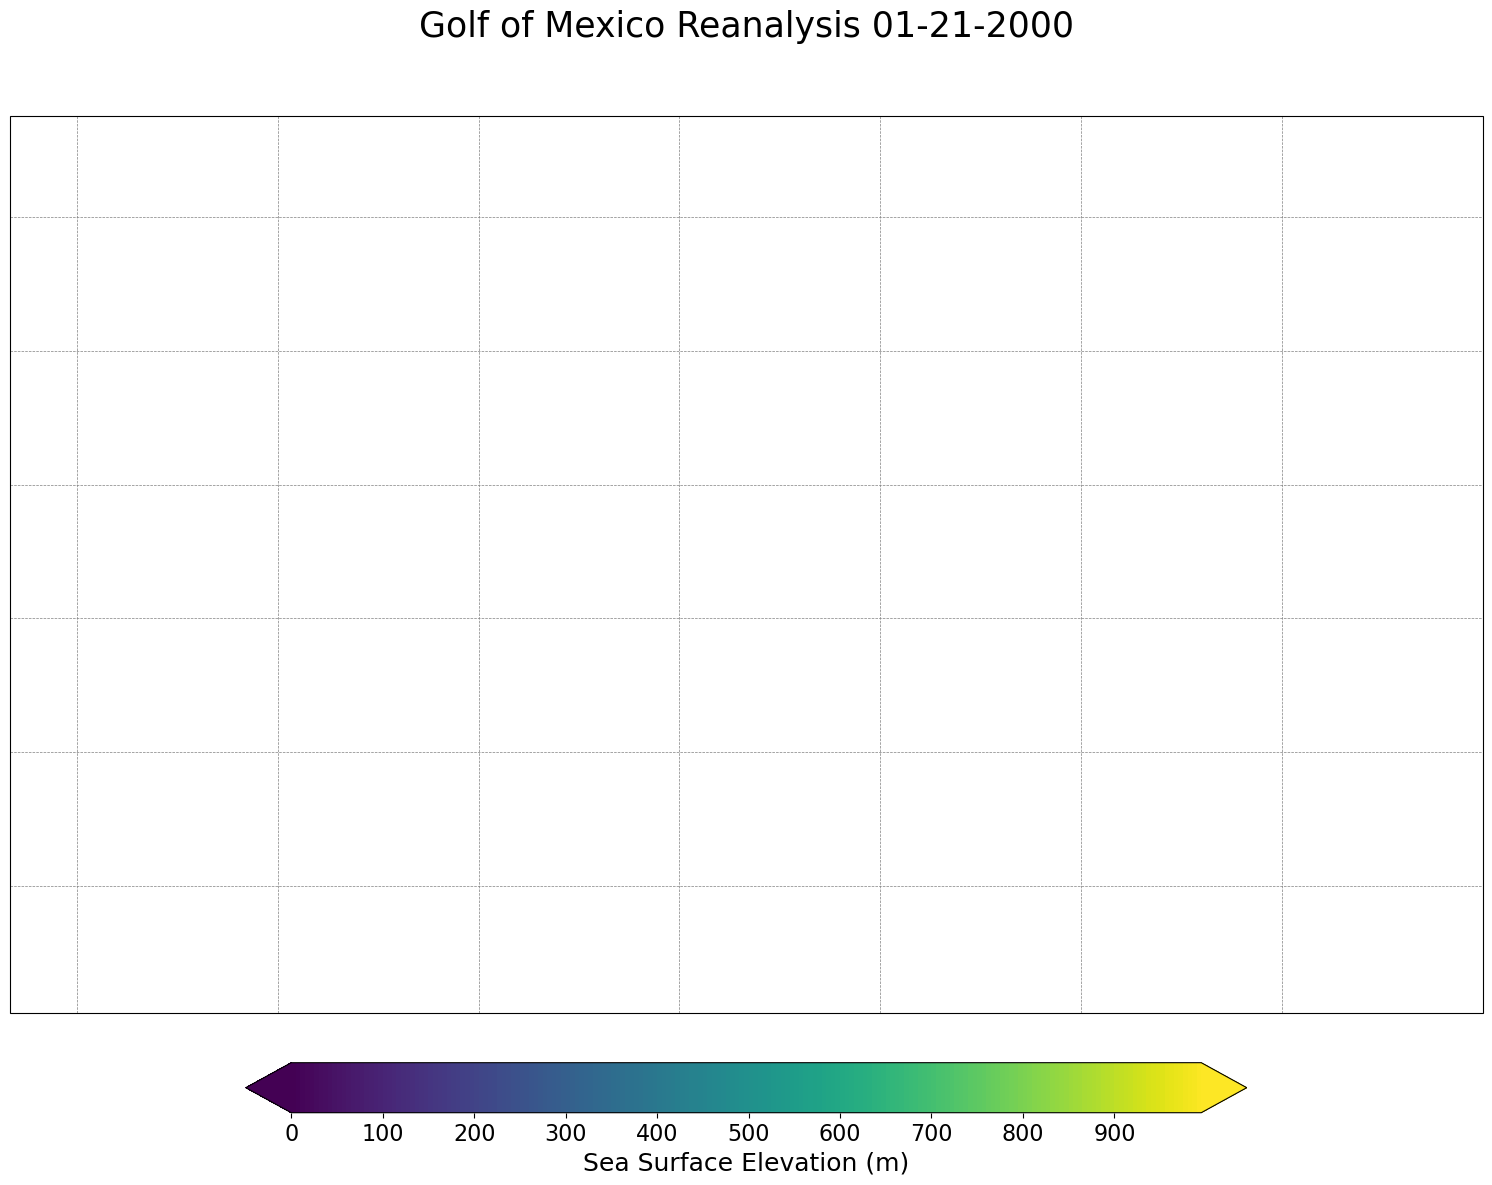

1753752.0
5


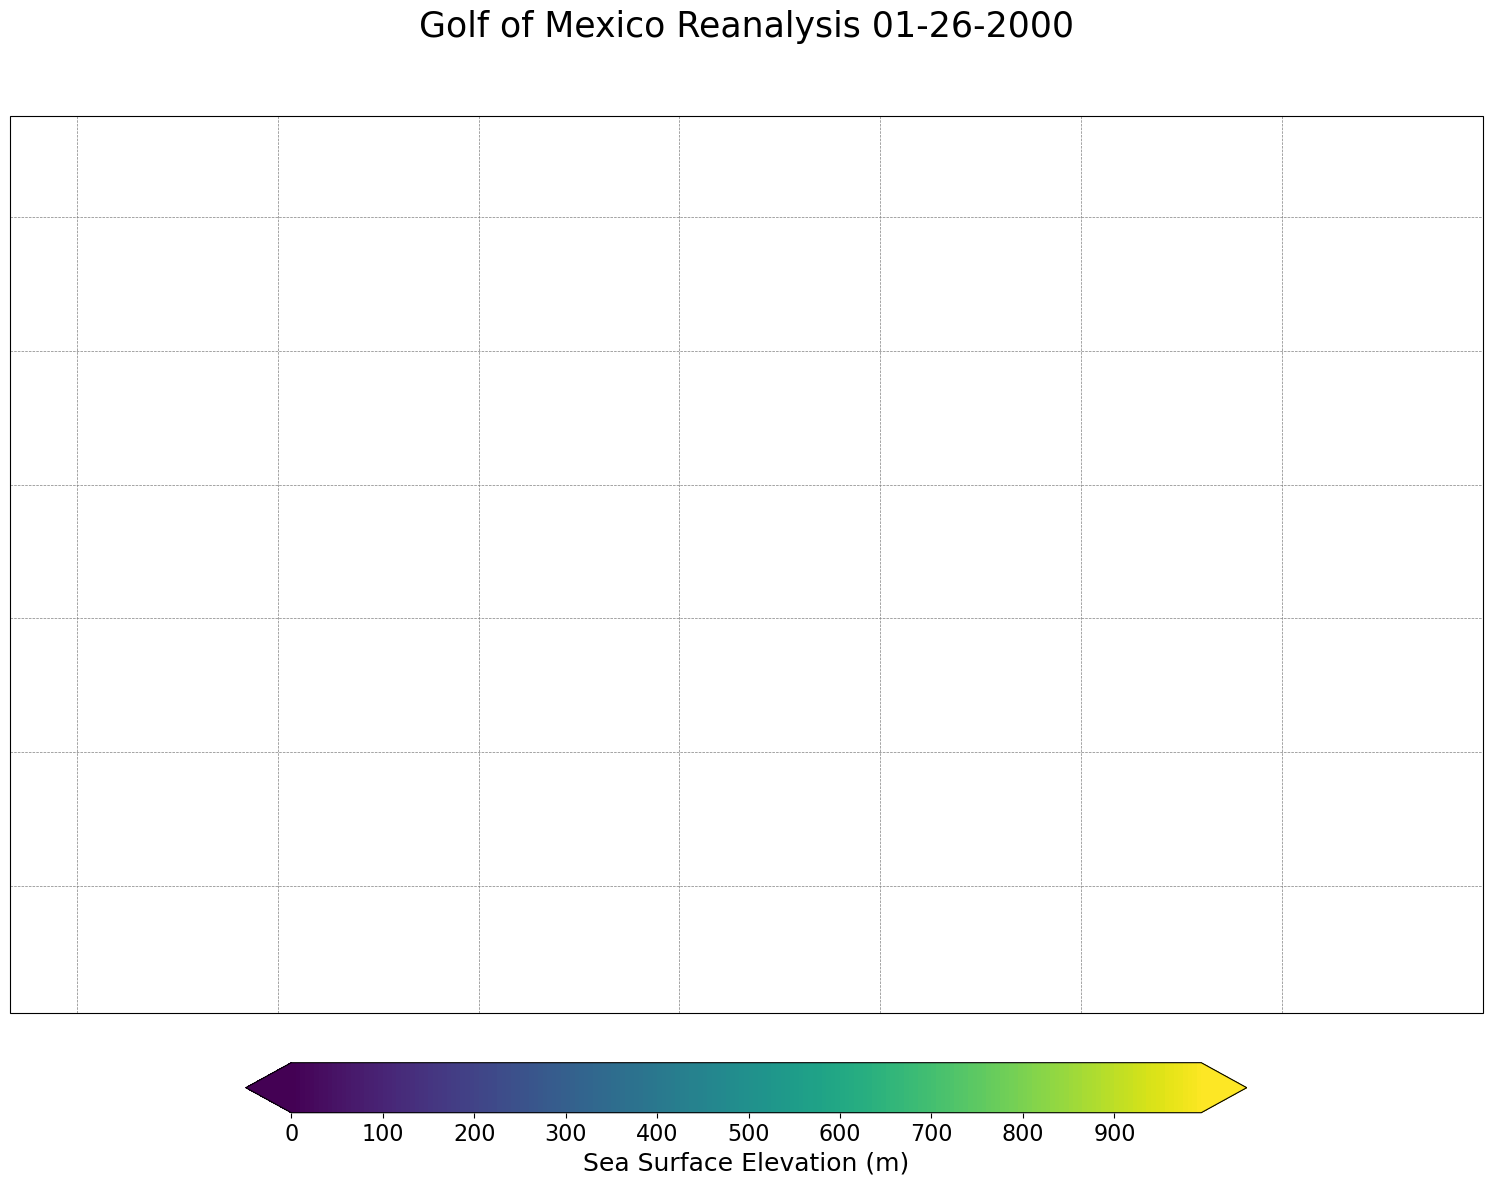

1753872.0
6


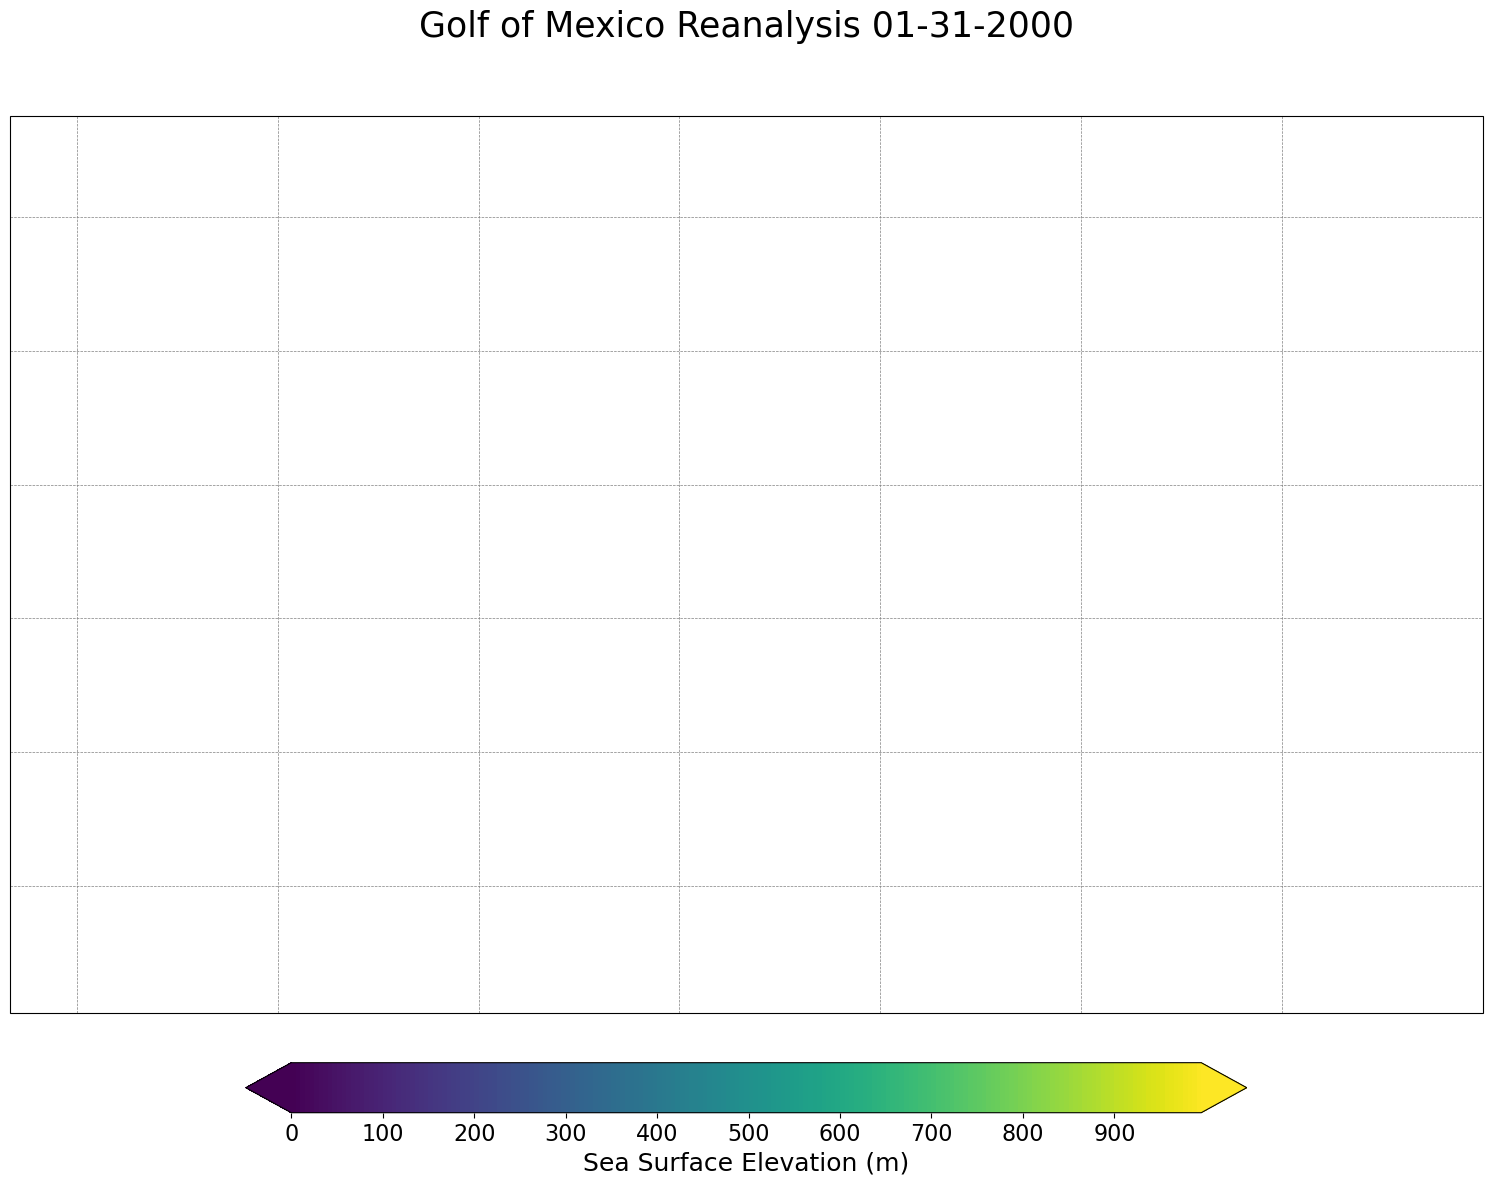

1753992.0
7


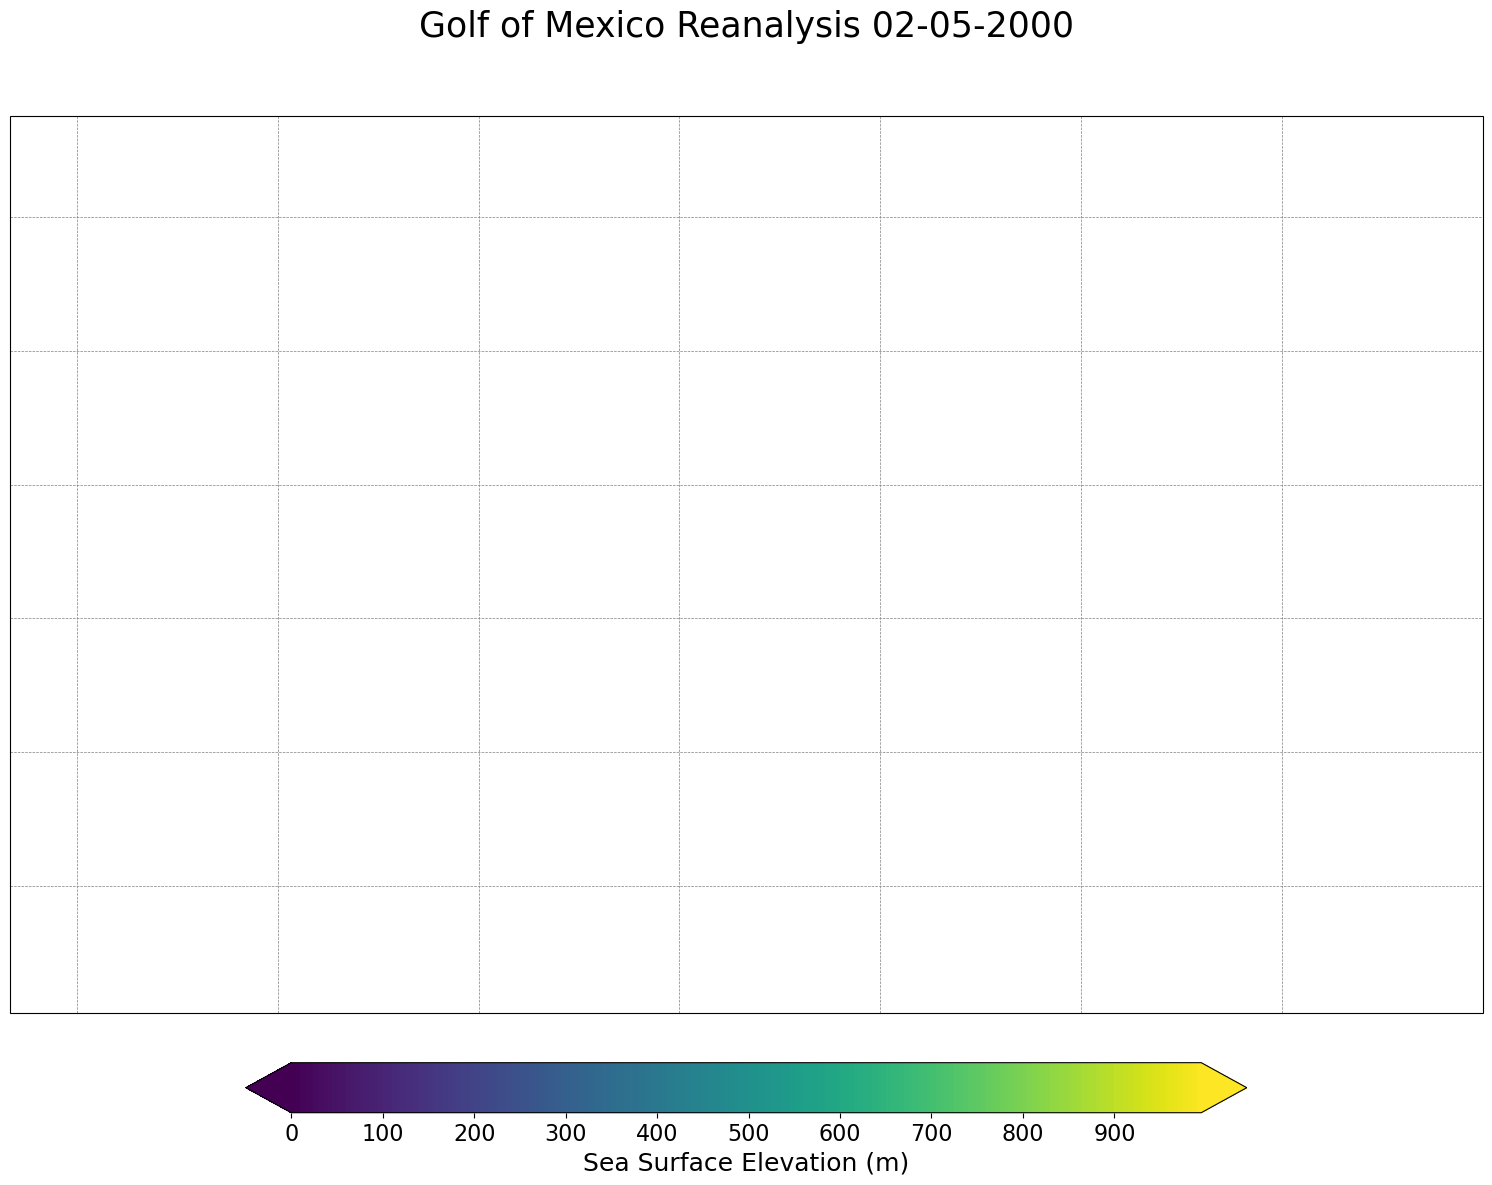

1754112.0
8


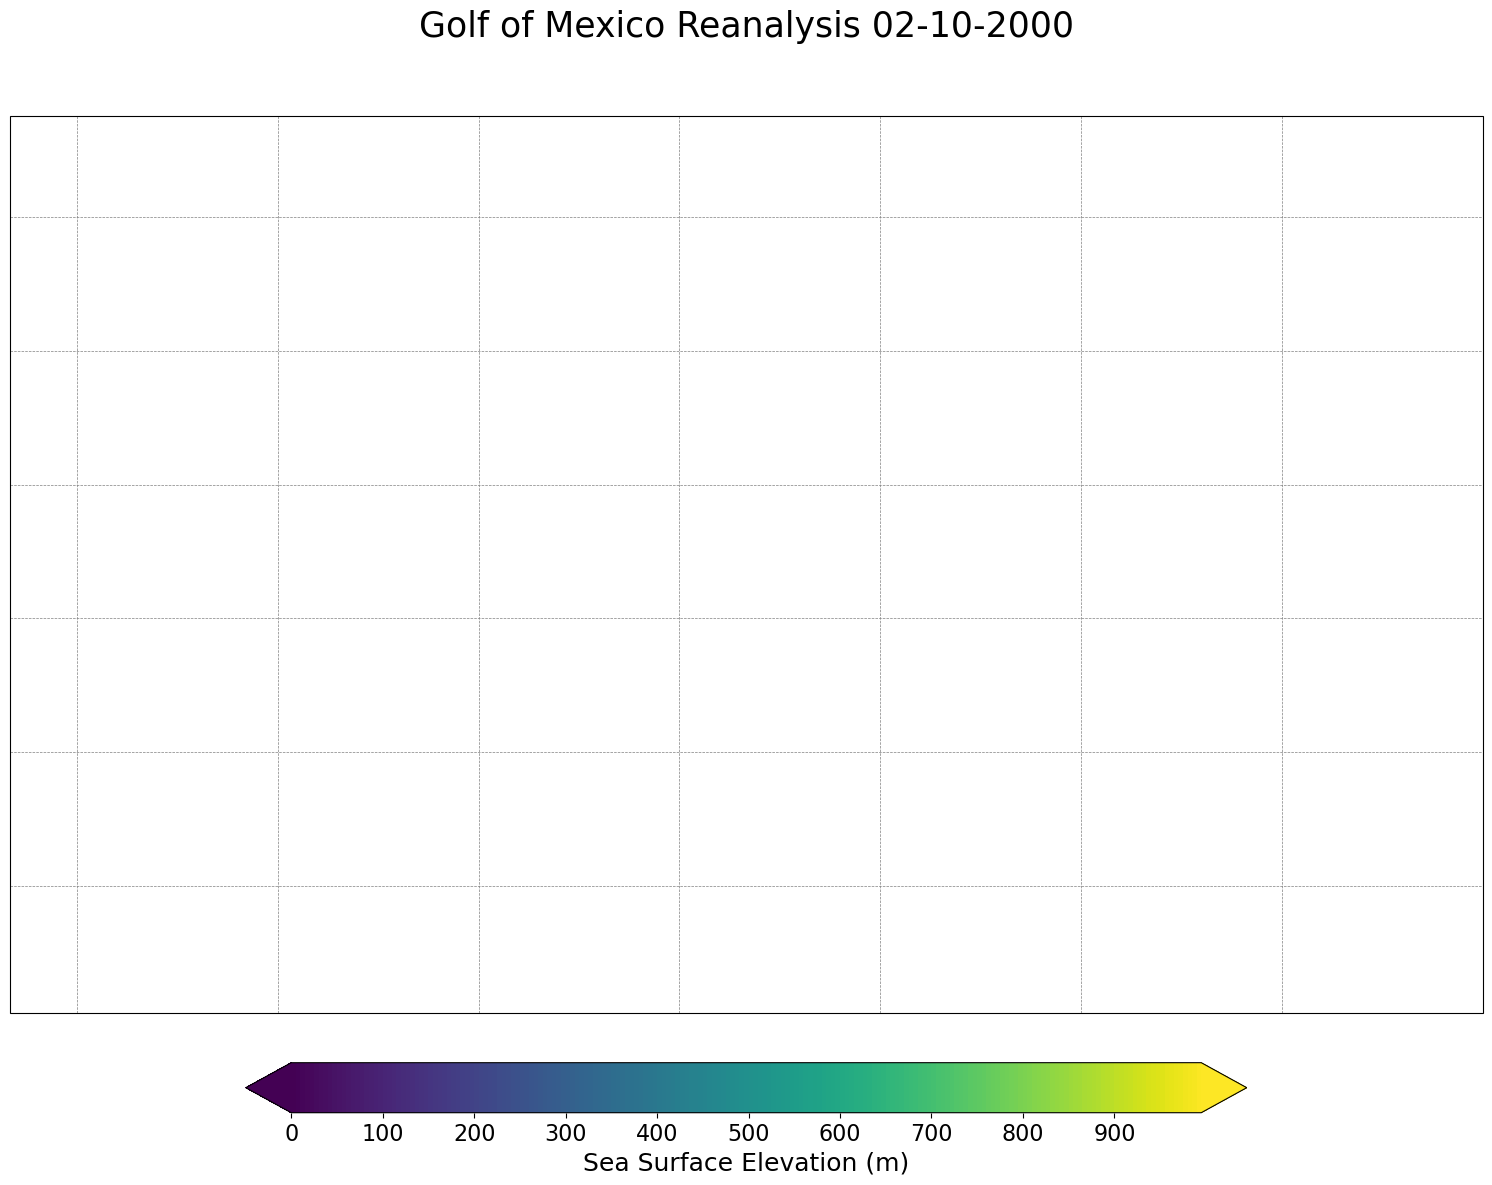

1754232.0
9


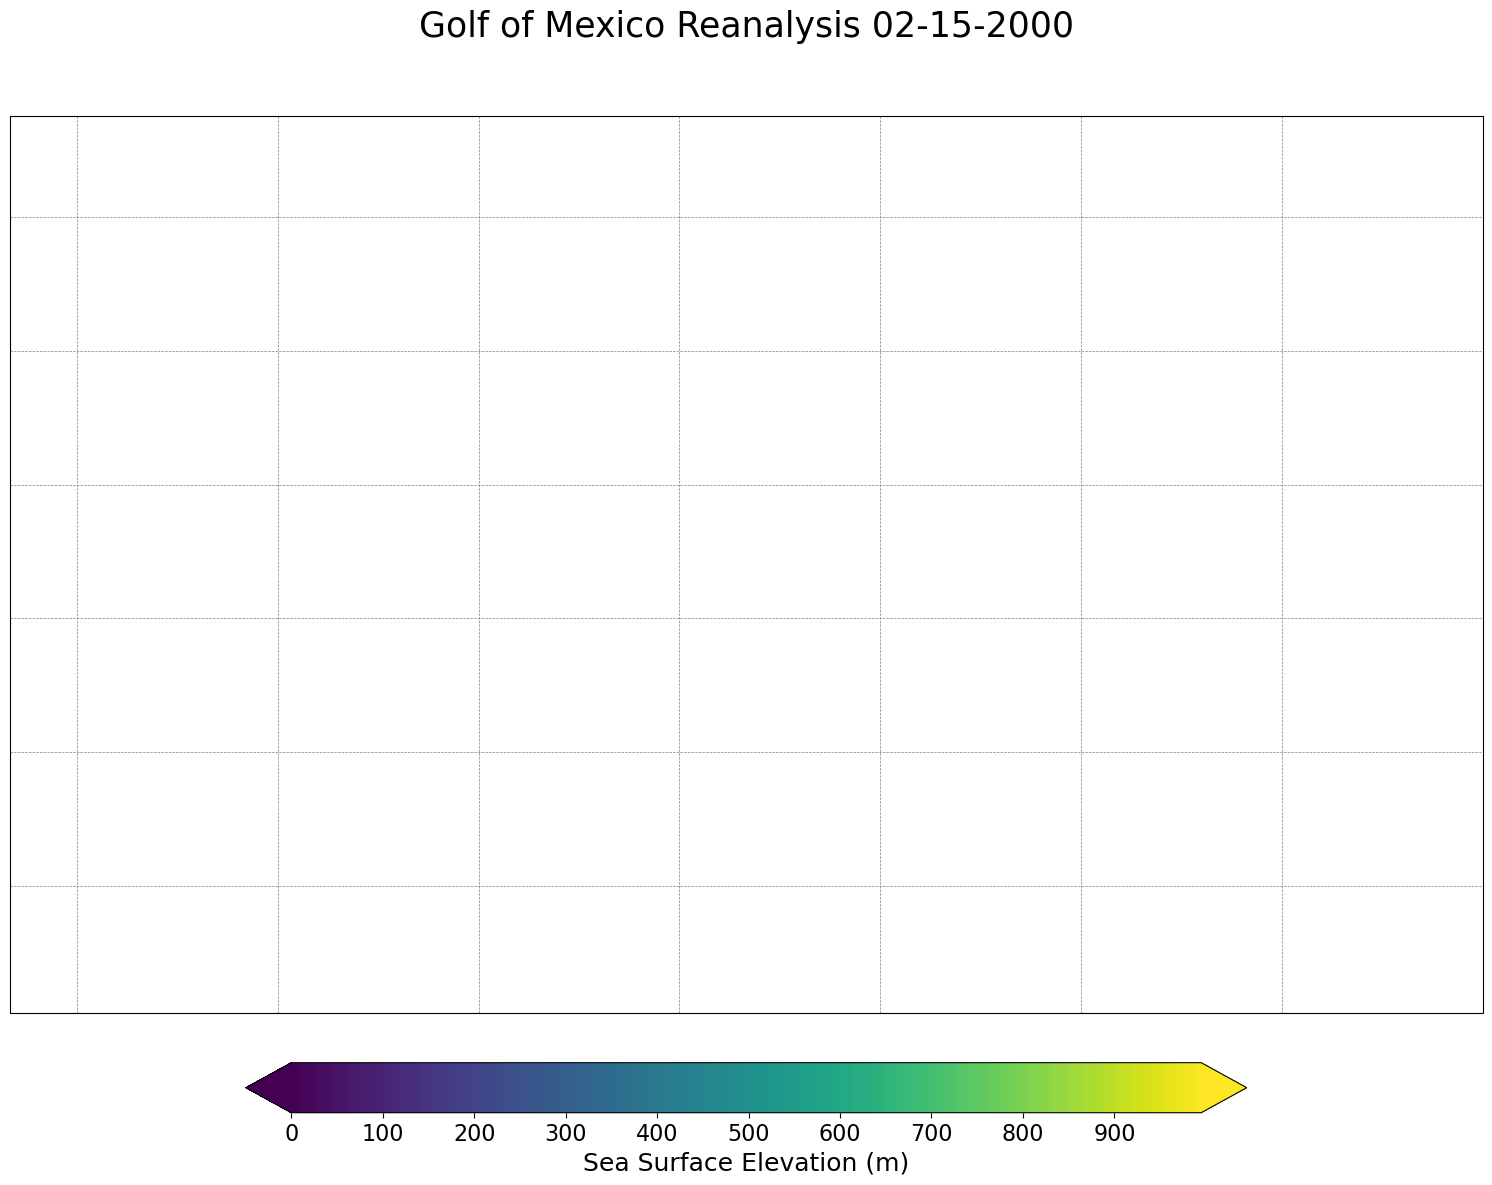

1754352.0
10


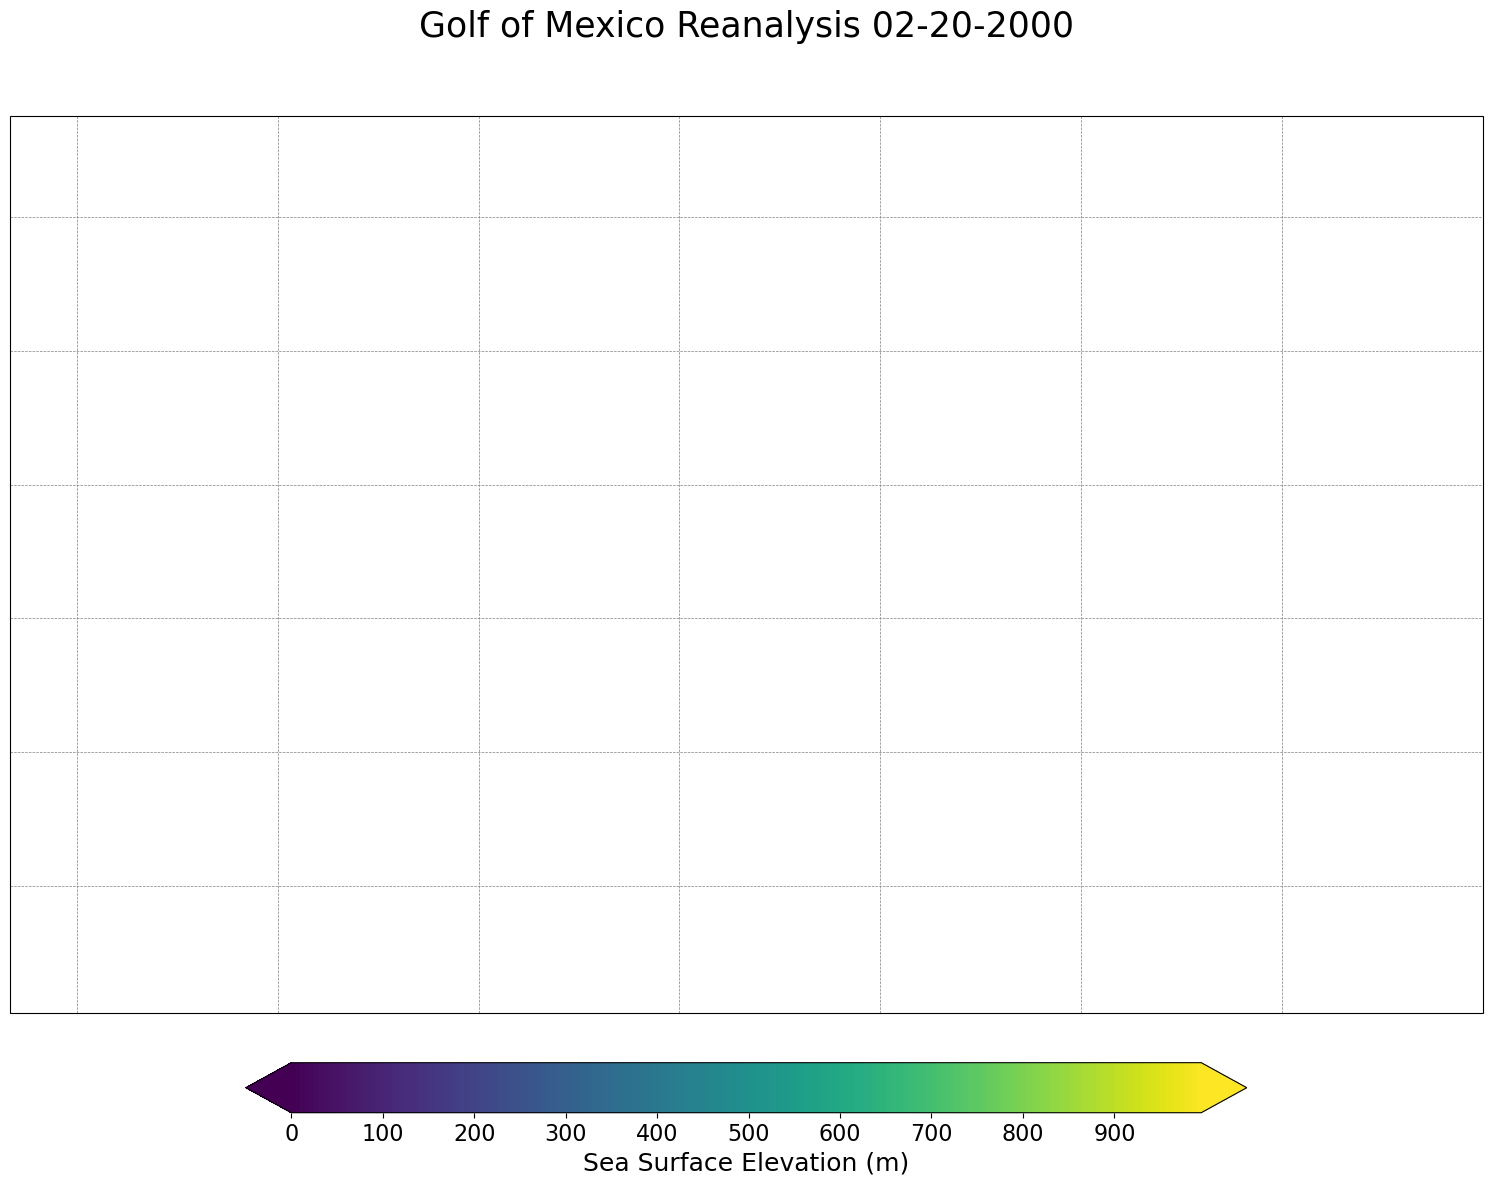

In [162]:
time = data['time']
start_datetime = pd.to_datetime('1800-01-01', format='%Y-%m-%d')
time_difference = data['time']
min_level = 0
max_level = 1000
levels = np.arange(min_level,max_level,5) #We want the range from our min to max incrementing by 0.1
for time in time_difference.values[0:11]:
    print(time)
    time_now = start_datetime + pd.Timedelta(time,'hours')
    date = time_now
    
    time_index = np.where(time_difference.values == time)[0][0]
    
    print(time_index)
    
    #Creates the type of projection and the area of the projection
    fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()),facecolor='white')  
    ax.set_extent([110,282, 18.11, 31.5])
    
    #set variables from the data that will be plotted onto the map
    var = data.precip[time_index,:,:] 
    x, y =data.lon, data.lat
    
    #Contours the data on tho the map projection
    p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(),vmin = min_level, vmax=max_level, levels = levels,extend='both')#,N=7)
    
    #Creates colorbar based on the contour 
    cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05,extend='bith')
    cbar.set_label("Sea Surface Elevation (m)" , size = 18)
    '''
    #Sets the land onto the projection with the right color and scale
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='black',
                                            facecolor='lightgrey')
    ax.add_feature(land_50m)
    '''
    #Sets the graph title and format the size and location of the title
    ax.set_title('Golf of Mexico Reanalysis '+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)
    
        ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
            #and sets the grid lines on the graph
        ##Set the grid lines to another variable so it edits the grid variables and not the whole map
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=.5, color='gray', linestyle='--')
    gl.xlabels_top = True    
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size' : 16}
    gl.ylabel_style = {'size' : 16}
    
    plt.show()
#Save the plot in the given location and name, with the extension of the date
fig.savefig(save_location + file_name +str(date.strftime("%m-%d-%Y")), bbox_inches='tight', dpi = 500)


#Increment the date, as we go through to the next file so it matches up with the correct time
date = date + timedelta(days=1)
   
